In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

![Two images. The first image shows a somewhat fuzzy digit one. The second image shows a 14x14 floating-point array in which most of the cells contain 0 but a few cells contain values between 0.0 and 1.0. The pattern of nonzero values corresponds to the image of the fuzzy digit in the first image.](https://www.tensorflow.org/images/MNIST-Matrix.png)

Each example in the MNIST dataset consists of:

* A label specified by a [rater](https://developers.google.com/machine-learning/glossary/#rater).  Each label must be an integer from 0 to 9.  For example, in the preceding image, the rater would almost certainly assign the label `1` to the example.

* A 28x28 pixel map, where each pixel is an integer between 0 and 255. The pixel values are on a gray scale in which 0 represents white, 255 represents black, and values between 0 and 255 represent various shades of gray.  

In [3]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
print('Training input size:', x_train.shape)
print('Training input label size:', y_train.shape)
print()
print('Testing input size:', x_test.shape)
print('Testing input label size:', y_test.shape)

Training input size: (60000, 28, 28)
Training input label size: (60000,)

Testing input size: (10000, 28, 28)
Testing input label size: (10000,)


In [6]:
print('Sample of training input')
print(x_train[1021])

Sample of training input
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  11 106 239  32   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   6  77 161 214 253 247  28   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   3  58 200 253 253 239 247 118   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  60 200 253 253 152 126 240  92   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  55 203 252 2

It seem like number 3. We can use matplotlib.pyplot.imshow to interpret the preceding numeric array as an image.

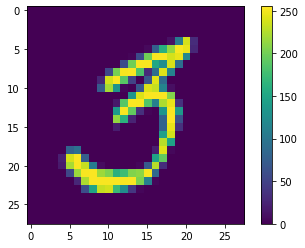

In [38]:
plt.figure()
plt.imshow(x_train[1021])
plt.colorbar()
plt.grid(False)
plt.show()

In image processing task, normalize the pixels values is common procedure.

In [10]:
max_pixel_value = 255.0
normalize_x_train = x_train / max_pixel_value
normalize_x_test = x_test / max_pixel_value

In [11]:
def plot_curve(epochs, hist, list_of_metrics):

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

In [13]:
num_possible_output = 10
learning_rate = 0.001

DNN_model = tf.keras.models.Sequential()
DNN_model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  
DNN_model.add(tf.keras.layers.Dense(units=32, activation='relu'))
DNN_model.add(tf.keras.layers.Dropout(rate=0.2))
DNN_model.add(tf.keras.layers.Dense(units=num_possible_output, activation='softmax'))     
                            
DNN_model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

The softmax activation function will output 10 possibilities values which indicate the input is mostly as which digit.

In [16]:
history = DNN_model.fit(x=normalize_x_train, 
                        y=y_train, 
                        batch_size=5000,
                        epochs=50, shuffle=True, 
                        validation_split=0.2)

epochs = history.epoch
hist = pd.DataFrame(history.history)

Epoch 1/50
10/10 [==============================] - 2s 33ms/step - loss: 2.2084 - accuracy: 0.1969 - val_loss: 1.7651 - val_accuracy: 0.5845
Epoch 2/50
10/10 [==============================] - 0s 13ms/step - loss: 1.6878 - accuracy: 0.5399 - val_loss: 1.2772 - val_accuracy: 0.7388
Epoch 3/50
10/10 [==============================] - 0s 13ms/step - loss: 1.2938 - accuracy: 0.6581 - val_loss: 0.9527 - val_accuracy: 0.8004
Epoch 4/50
10/10 [==============================] - 0s 14ms/step - loss: 1.0417 - accuracy: 0.7148 - val_loss: 0.7542 - val_accuracy: 0.8332
Epoch 5/50
10/10 [==============================] - 0s 14ms/step - loss: 0.8746 - accuracy: 0.7579 - val_loss: 0.6327 - val_accuracy: 0.8553
Epoch 6/50
10/10 [==============================] - 0s 14ms/step - loss: 0.7671 - accuracy: 0.7854 - val_loss: 0.5560 - val_accuracy: 0.8711
Epoch 7/50
10/10 [==============================] - 0s 14ms/step - loss: 0.6910 - accuracy: 0.8059 - val_loss: 0.5022 - val_accuracy: 0.8818
Epoch 8/50
10

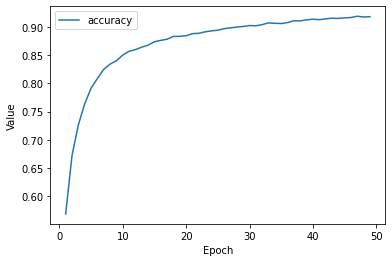

In [17]:
plot_curve(epochs, hist, ['accuracy'])

In [21]:
eval_hist = DNN_model.evaluate(x=normalize_x_test, y=y_test, batch_size=5000)

2/2 [==============================] - 0s 10ms/step - loss: 0.2046 - accuracy: 0.9425


In [42]:
print("Generate predictions for first 3 samples")
pred_prob = DNN_model.predict(normalize_x_test[:3])
pred_prob

Generate predictions for first 3 samples


array([[5.12696824e-05, 8.55883172e-07, 3.84409359e-04, 1.39342528e-03, 1.14503116e-07, 3.88216722e-05, 2.37397202e-07, 9.98009145e-01, 7.01588851e-06, 1.14796538e-04],
       [1.33037262e-04, 3.28982278e-04, 9.97170389e-01, 3.78367666e-04, 4.39883969e-08, 8.26488395e-05, 1.84073474e-03, 2.54887652e-07, 6.55471158e-05, 9.22998400e-10],
       [2.74691673e-04, 9.71217215e-01, 7.10834842e-03, 4.42994712e-03, 2.02057970e-04, 1.19132095e-03, 5.59784763e-04, 8.06467235e-03, 6.35720324e-03, 5.94713958e-04]], dtype=float32)

In [49]:
print('The prediction output are:')
for i in range(len(pred_prob)):
  print(np.argmax(pred_prob[i]))

The prediction output are:
7
2
1


In [50]:
y_test[:3]

array([7, 2, 1], dtype=uint8)

In [52]:
pred_output = DNN_model.predict(normalize_x_test)
pred_output

array([[5.1269781e-05, 8.5588476e-07, 3.8440988e-04, ..., 9.9800915e-01, 7.0158958e-06, 1.1479654e-04],
       [1.3303726e-04, 3.2898228e-04, 9.9717039e-01, ..., 2.5488742e-07, 6.5547116e-05, 9.2299840e-10],
       [2.7469167e-04, 9.7121722e-01, 7.1083452e-03, ..., 8.0646686e-03, 6.3572000e-03, 5.9471343e-04],
       ...,
       [3.2005590e-07, 2.0422973e-05, 1.9555971e-05, ..., 1.0418742e-04, 5.3392735e-04, 1.5675567e-02],
       [7.4199554e-05, 2.7404554e-05, 3.1581760e-05, ..., 8.2994575e-06, 3.4489125e-02, 6.2814083e-06],
       [1.0922209e-05, 5.9248215e-08, 8.2887441e-04, ..., 2.1672801e-07, 3.0917275e-07, 1.2643024e-08]], dtype=float32)

In [59]:
Actual_digits = [0,1,2,3,4,5,6,7,8,9]

def plot_image(i, predictions_array, true_label, img):
  true_label, img = y_test[i], normalize_x_test[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(Actual_digits[predicted_label],
                                100*np.max(predictions_array),
                                Actual_digits[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

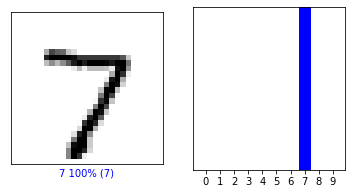

In [60]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred_output[i], y_test, normalize_x_test)
plt.subplot(1,2,2)
plot_value_array(i, pred_output[i],  y_test)
plt.show()

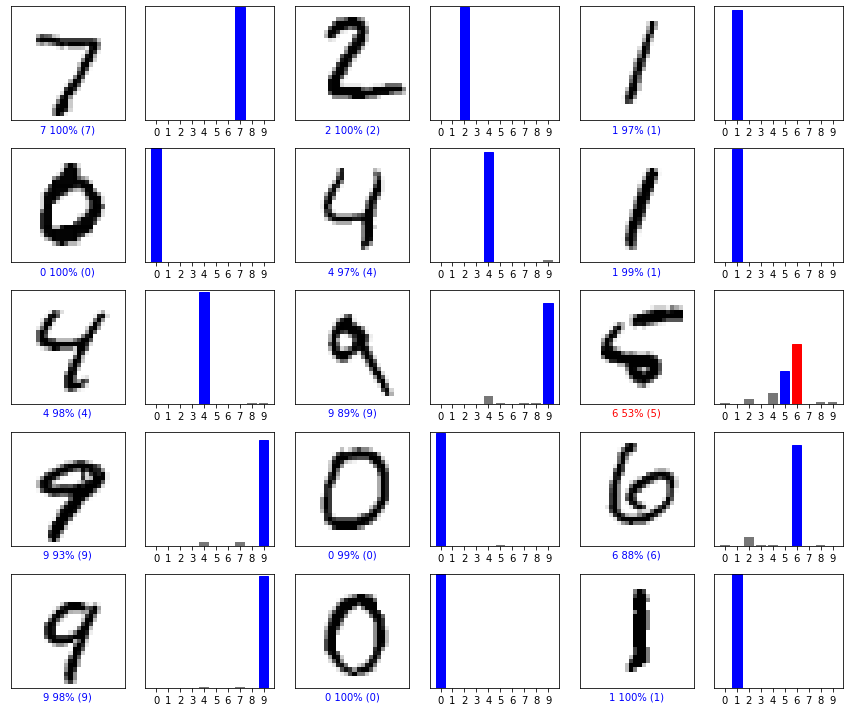

In [61]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred_output[i], y_test, normalize_x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred_output[i], y_test)
plt.tight_layout()
plt.show()